# Unsupervised Learning Predict - Movie Recommender System Challenge
© Explore Data Science Academy

---
### Honour Code

We, **XXX** {**#Team_NM3**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## Table of Contents

#### Section 1: Data Pre-processing

<a href=#one>1.1 Importing Packages</a>

<a href=#two>1.2 Loading Data</a>

<a href=#three>1.3 Exploratory Data Analysis (EDA)</a>

<a href=#four>1.4 Data Engineering</a>

#### Section 2: Model Development and Analysis

<a href=#five>2.1 Modeling</a>

<a href=#six>2.2 Model Performance</a>

#### Section 3: Model Explanation and Conclusions

<a href=#seven>3.1 Model Explanations</a>

<a href=#seven>3.2 Conclusions</a>

# Introduction
In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity. 

This Notebook has been adapted and developed by **XXX** - a group of seven students from the July 2022 cohort of the Explore Ai Academy **Data Science** course. We are:

 > Josiah Aramide <br>
 > Bongani Mavuso <br>
 > Ndinannyi mukwevho <br>
 > Aniedi Oboho-Etuk <br>
 > Manoko Langa <br>
 > Tshepiso Padi <br>
 > Nsika Masondo <br>
 

### Problem Statement

The client is determined to improve its recommender system service offering to targeted consumer categories based on their movie content rating. 

Data from the historical viewing experiences, available to the company contains some preference and similarity characteristics that can ensure accurate prediction of consumer behaviour. 

By constructing a recommendation algorithm based on content or collaborative filtering, **XXX** team can develop a solution capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences. This solution can give the company access to immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.


### Objectives

**XXX** seeks to achieve the following objectives for the project brief:

- 1. analyse the supplied data;
- 2. identify underlying patterns and potential errors in the data and clean the existing data set;;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a recommendation algorithm based on content or collaborative filtering that is capable of capable of accurately predicting how a user will rate a movie they have not yet viewed;
- 5. evaluate the accuracy of the best machine learning model; and
- 6. explain the inner working of the model to a non-technical audience.

# Section 1: Data Pre-processing

This section describes steps for installing dependencies and requirements, initializing the experiment on Comet, importing packages, loading the two datasets - train and test datasets, conducting the exploratory data analysis (EDA) and implementing data engineering.

 <a id="one"></a>
## 1.1 Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Below are the libraries and tools imported for use in this project. The libraries include:
   - **numpy**: for working with arrays,
   - **pandas**: for tansforming and manipulating data in tables,
   - **matplotlib**: for creating interactive visualisations,
   - **seaborn**: for making statistical graphs and plots,
   - **scikit-learn**: for machine learning and statistical modeling, and
   - **math**: for algebraic notations and calculations.

---

In [5]:
# --> uncomment these lines below if the dependent code cells do not run

!pip install comet_ml # Comet installation for Jupyter Notebook/Collab
!pip install git+https://github.com/microsoft/recommenders.git
!pip install kneed # knee (/elbow) point detection for cluster optimization
!pip install tf_slim
!pip install downcast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.9/450.9 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.4/504.4 kB 7.8 MB/s eta 0:00:00a 0:00:01
  Cloning https://github.com/microsoft/recommenders.git to /tmp/pip-req-build-k9mdjq9t
  Running command git clone --filter=blob:none --quiet https://github.com/microsoft/recommenders.git /tmp/pip-req-build-k9mdjq9t
  Resolved https://github.com/microsoft/recommenders.git to commit d110a1024d3044ee38059245b81383679d4569ea
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.9/355.9 kB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━

In [6]:
# Libraries for data loading, data manipulation and data visulisation 
import numpy as np   # for working with 
import pandas as pd  # for data processing, CSV file I/O (e.g. pd.read_csv)
from recommenders.datasets.python_splitters import python_chrono_split
from downcast import reduce
import matplotlib.pyplot as plt  # for making visualisations and plots
import scipy as sp # The numpy alternate, used here for numerical efficiency
import seaborn as sns
import datetime as dt
import math
import time
import pickle
%matplotlib inline

# Libraries for collecting experiment parameters
import os
import warnings
warnings.filterwarnings("ignore")
import comet_ml
from comet_ml import Experiment

# Libraries for data engineering and model building
from sklearn import preprocessing
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists
from ast import literal_eval

# Libraries for Building Models
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from surprise.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression #determine mutual info
from sklearn.datasets import make_blobs
from surprise import Reader, Dataset, SVD, NormalPredictor
from surprise.model_selection import cross_validate
from recommenders.models.ncf.ncf_singlenode import NCF

import sys
from sys import exc_info
import ast

# Libraries for model performance (metrics)
from sklearn import metrics
from sklearn.metrics import log_loss
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [7]:
# Input data files are available in the Kaggle "../input/" directory.
# Thus, running this code cell will list all files under the input directory
# These file paths can be used to load the datasets into this notebook
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-predict/movies.csv
/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-predict/train.csv
/kaggle/input/edsa-movie-recommendation-predict/test.csv
/kaggle/input/edsa-movie-recommendation-predict/tags.csv
/kaggle/input/edsa-movie-recommendation-predict/links.csv


In [8]:
# Create an instance of Comet experiment with TeamNM3's API key
experiment = Experiment(
    api_key="RpnzF8DcMSor3mXqAfEQqsXjv",
    project_name="unsupervised-learning-predict",
    workspace="teamnm3",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using Experiment.log_metrics() and Experiment.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/kaggle/working' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/teamnm3/unsupervised-learning-predict/a77d34eef1884d15935754ce6da0181d



<a id="two"></a>
## 1.2 Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, data is loaded from the **xxxxx** made available to **TeamNM3** by the client, **Explore-AI**. This involves reading the data from the `.csv` file format into a Pandas dataframe. The Pandas dataframe allows for easy views and manipulations of the data in the form of tables and can be combined with other python libraries like numpy for desirable results. |

---

In [9]:
# Store datasets in a Pandas Dataframe
df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')
df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')
df_mov = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')
df_gs = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv')
df_gt = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv')
df_imdb = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')
df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/links.csv')
df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/tags.csv')

<a id="three"></a>
## 1.3 Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, an in-depth analysis (graphical and non-graphical) of the supplied data is conducted. This includes: 
 - viewing the matrix to determine the dimensions of the data;
 - identifying the features and target;
 - investigating the formatting of the data (types, nulls etc.)
 - viewing the xxx;
 - identifying the xxx;
 - analysing the xxx;
 .|

---

### 1.3.1 Viewing the matrix (dimensions) of the data
First, it is necessary to view the matrix of the supplied datasets to see the total number of rows, number of columns, the content and the format (datatypes) of the features within each of the datasets.

In [10]:
# Create a function to return the matrix of datasets
def data_matrix(df, label):
    '''
    df: (pd) pandas dataframe of the dataset
    label: (str) a string to describe the dataset name
    '''
    df.shape
    nRow, nCol = df.shape
    print(f'There are {nRow} rows and {nCol} columns in the {label} dataset')

In [11]:
data_matrix(df_train, 'train'), # Train dataset Matrix
data_matrix(df_test, 'test'), # Test dataset Matrix
data_matrix(df_mov, 'movies'), # Movie dataset Matrix
data_matrix(df_gs, 'genome_scores') # Genome scores dataset Matrix

There are 10000038 rows and 4 columns in the train dataset
There are 5000019 rows and 2 columns in the test dataset
There are 62423 rows and 3 columns in the movies dataset
There are 15584448 rows and 3 columns in the genome_scores dataset


In [12]:
data_matrix(df_gt, 'genome_tags') # Genome tags dataset Matrix
data_matrix(df_imdb, 'imdb') # IMDB dataset Matrix
data_matrix(df_links, 'links') # Links dataset Matrix
data_matrix(df_tags, 'tags') # Tags dataset Matrix

There are 1128 rows and 2 columns in the genome_tags dataset
There are 27278 rows and 6 columns in the imdb dataset
There are 62423 rows and 3 columns in the links dataset
There are 1093360 rows and 4 columns in the tags dataset


### OBSERVATION
- As the results show, the train dataset contains a little over **10 million** rows of data** in 4 columns of features. 
- The test dataset contains exactly half of that number of observations (**5,000,019**) with only 2 columns of features.

- Other datasets contain ...

Next, a peek view of some of the rows in the dataset should be of interest. This can be accomplished with the `pd.head()` command as seen in the code cell below. The command can take an argument specifying the number of rows to view (15 in this example), otherwise it returns the first 5 rows by default. 

In [13]:
# View top of datasets, train set

df_train.head(10)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
5,120949,81768,3.0,1289595242
6,19630,62049,4.0,1246729817
7,21066,2282,1.0,945785907
8,117563,120474,4.0,1515108225
9,144018,1997,5.0,1109967647


In [14]:
# looking at the test set
df_mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
df_gs.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [16]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


### OBSERVATION
- The output indicates that the `xxx` column (features) contains xxx. These will need to be addressed during the feature engineering phase in order to derive any usefulness from them.


In [17]:
# Data Types and Non-null count 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [18]:
# Confirm the Non-null count for train data
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [19]:
# Summary Statistics of our train dataset
df_train.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


### OBSERVATION
- From above, it can be observed that the dataset appears to have no missing values. That is, the count of non-null rows equals the expected count of entries in the columns. 

In [20]:
# check for duplicates in the train dataset
df_train[df_train.duplicated(keep=False)]

,userId,movieId,rating,timestamp


### OBSERVATION
 - It is immediately obvious that there are no duplicates in the train dataset, as seen from above output statement

### 1.3.2 Visualisation: Histogram and Distribution plot of features (showing outliers)

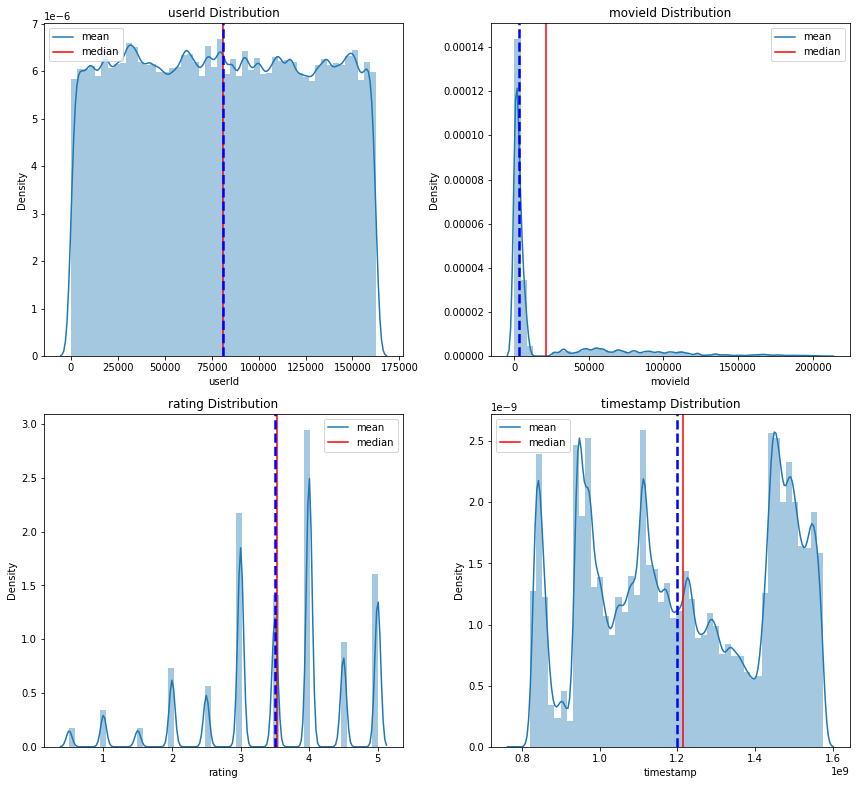

In [21]:
# Visualize the distribution of each variable in the train dataset
plt.figure(figsize=(12,16))
for i, j in enumerate(df_train.describe().columns):
    plt.subplot(3,2, i+1)
    sns.distplot(x=df_train[j])
    plt.xlabel(j)
    plt.axvline(x=df_train[j].mean(),color='red',label='mean')
    plt.axvline(x=df_train[j].median(),color='blue',label='median',ls='--',lw=2.5)
    plt.title('{} Distribution'.format(j))
    plt.legend(['mean', 'median'])
    
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

### 1.3.3 Visualisation: Boxplot of features (showing outliers)

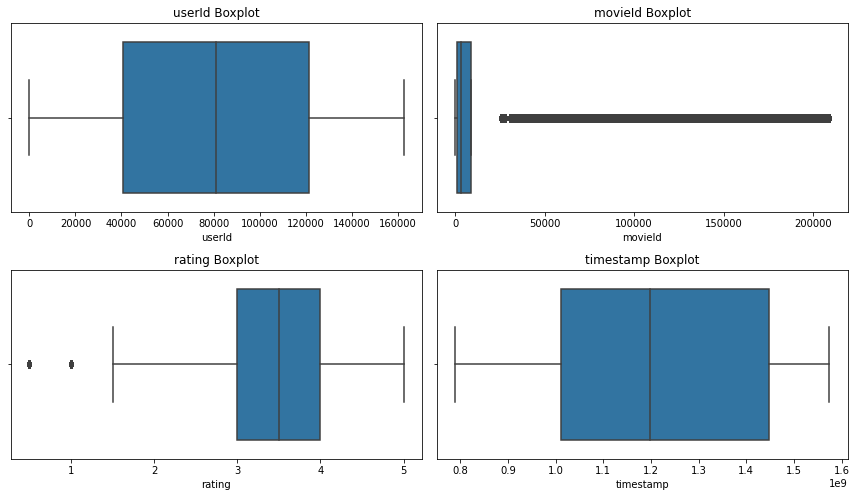

In [22]:
# Next, Visualize the boxplot of each variable in the train dataset.
plt.figure(figsize=(12,10))
for i, j in enumerate(df_train.describe().columns):
    plt.subplot(3,2, i+1)
    sns.boxplot(x=df_train[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
    
plt.show()

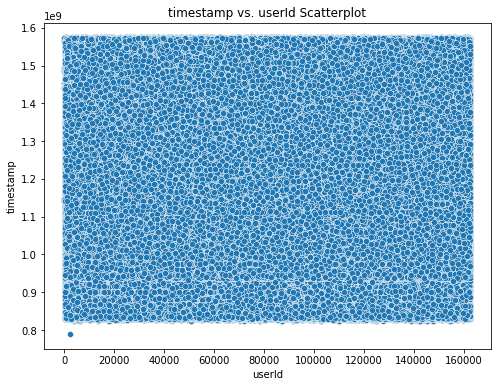

In [24]:
# compare features with similar boxplots on a scatter plot
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df_train.userId, y=df_train.timestamp)
plt.title('timestamp vs. userId Scatterplot')
plt.savefig('scatter.png')
plt.show()

data needs to be scaled to make sense of the multivariate trends across features

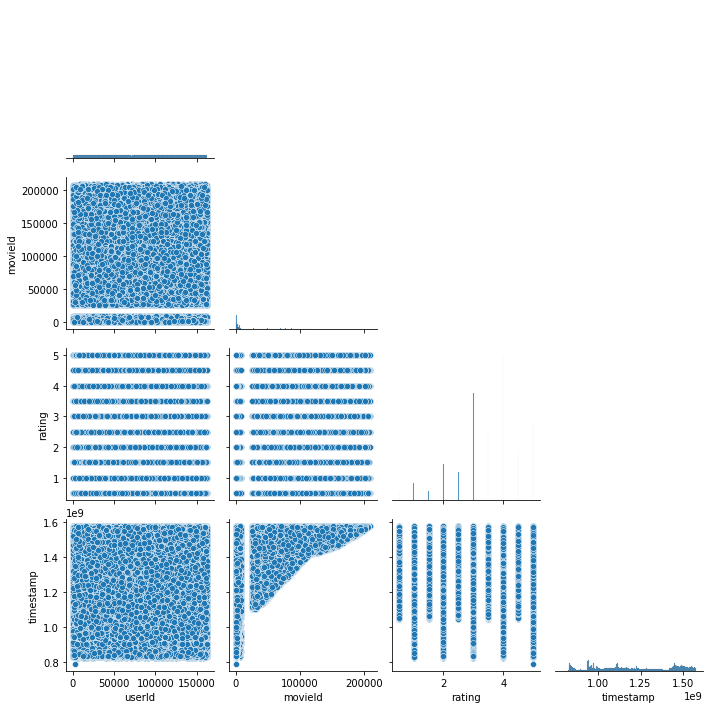

In [25]:
# check correlation among variables (multivariate analysis)
pairplot = sns.pairplot(df_train, corner=True)
plt.show(pairplot)

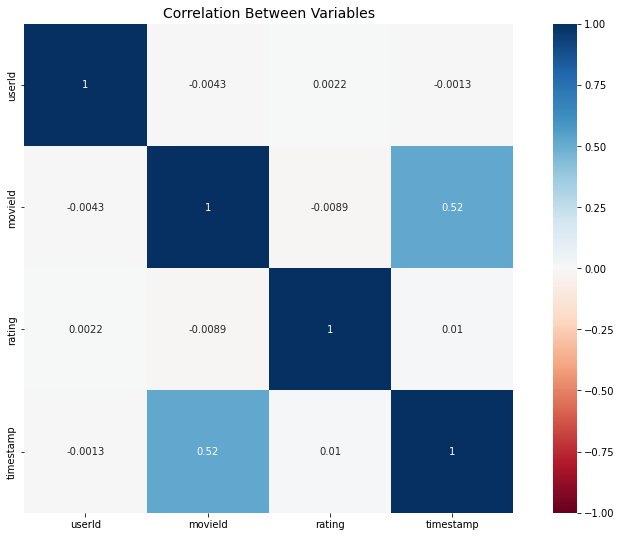

In [26]:
# heatmap view of correlation among variables in the train dataset
correlation_metrics=df_train.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

### OBSERVATION
- The barplots above confirm the 

For now, this seems to be as much insight as can be displayed from the raw dataset. In the next stage of Data Engineering, the observations highlighted will be implemented particularly those that have to do with cleaning the message, removing outliers and noise, and manipulating the result into a format appropriate for use in machine learning models.

The following section details how to achieve just that!

### Determine number of clusters with elbow method

Check the number of clusters in the train dataset to determine optimal expected groups in case the clustering technique is to be applied.

In [28]:
# defining global scaler objects
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

# scale the dataframe
train_scaled = ss.fit_transform(df_train)
scaled_df_train = pd.DataFrame(train_scaled, columns=['userId', 'movieId', 'rating', 'timestamp'])
scaled_df_train

,userId,movieId,rating,timestamp
0,-1.624926,0.925607,0.439727,1.333994
1,0.537337,-0.545572,0.910925,-0.041600
2,1.401707,-0.406424,1.382124,-0.614662
3,0.537743,0.278267,-1.445067,0.913937
4,-1.542051,-0.536362,-0.502670,-1.684949
...,...,...,...,...
10000033,1.179562,1.982991,1.382124,1.346709
10000034,1.258269,-0.531591,-0.502670,-0.939198
10000035,1.573034,0.902977,0.439727,0.052877
10000036,0.098430,-0.537357,0.439727,1.164625


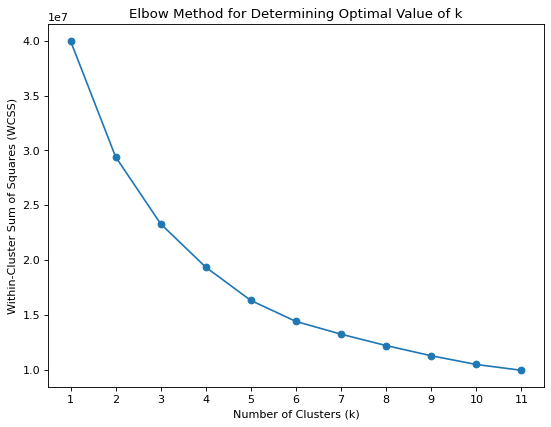

In [29]:
###Decide n-cluster using Elbow Method
wcss=[]
k_range = range(1,12)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df_train)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')
    
plt.xticks(k_range)
# plt.grid()
plt.title('Elbow Method for Determining Optimal Value of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.savefig('num_clust.png')
plt.show()

In [30]:
# confirm K number selection with knee locator
kl = KneeLocator(range(1, 12), wcss, curve="convex", direction="decreasing")
kl.elbow


5

<a id="four"></a>
## 1.4 Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we conduct our feature engineering to: 
- clean identified errors from the dataset;
- enrich the dataset by creating new features;
- split the dataset into training and validation sets for use by selected models;
- standardize the dataset;
- 
- 

These steps follow the insights that were gathered earlier during the EDA phase.|

---

### 1.4.1 Preprocessing 1: Cleaning and Filtering (with Feature selection)
The first step is to begin organising the data cleaning exercise by building smart functions so that these can be recalled for cleaning both the training and testing datasets. Without this logical flow of cleaning the data, the exercise can quickly get very messy.

In [31]:
df_mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We observe the year 1995 attached to the top 5 movies. Most movie titles are in same format.

Let us strip off the year

In [32]:
# removing years in title
df_mov['title'] = df_mov.title.str.replace('(\(\d\d\d\d\))', '')
df_mov['title'] = df_mov['title'].apply(lambda x: x.strip())
df_mov.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


### Base Model

### Recommender system (Collaborative) with Surprise

In [8]:
# instantiate an object for the 'surprise' package
reader = Reader(rating_scale=(0,5))

In [10]:
# load dataset from the 'train_df' to build train set
df_train_data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

# instantiate a Singular Value Decomposition (SVD) object for the dataset
svd = SVD()
# df_train_data = cross_validate(svd, df_train_data, measures=['RMSE', 'MAE'], cv=5)
# evaluate(svd, df_train_data, measures=['RMSE', 'MAE'])

In [12]:
# fit our trainset dataset to the svd object
trainset = df_train_data.build_full_trainset()
svd.fit(trainset)

In [38]:
# check sample prediction with selected userId "1" and movieId "302"
predict_test = svd.predict(1, 302, 3)[3]
print(predict_test)

4.043808451547402


In [39]:
# identify variables to loop through for prediction over the test dataset
userId = df_test.userId.astype(int)
movieId = df_test.movieId.astype(int)

userId = df_test.userId
movieId = df_test.movieId

# iterate over the df_test columns, look in userId and movieId
# make a prediction for each userId, movieId

predictions = []
for index, col in df_test.iterrows():
    userId = index
    movieId = col['movieId'] 
    predictions.append(svd.predict(userId, movieId)[3])

In [40]:
# confirm first 15 predicted ratings are valid for the submission file
print(predictions[:15])

[3.547871046205975, 4.2708633799638935, 3.0521187716496816, 4.503905849924764, 2.9246610298596214, 4.136758899850001, 4.19966408655776, 3.868496298182924, 4.168584240551097, 4.395069855612907, 3.475856756842614, 2.8408857930006586, 4.120197976494219, 4.962047658784776, 4.360212715912851]


In [ ]:
# create a complete Kaggle submission file for the base model
results_dict = pd.DataFrame({
                    'Id':df_test['userId'].astype(str) 
                            +'_'+ df_test['movieId'].astype(str),
                    'rating': predictions})

results_dict.to_csv('submission_base3.csv', index = False)

### Developing Other Models

### Recommender system (Content-Based) with Candidate Generation and Matrix Factorization

#### Copy Dataset

To preserve the main dataset we create a copy for our modeling

In [34]:
ratings = df_train.copy()

movies_list = np.unique(ratings['movieId'])[:]
ratings = ratings.loc[ratings['movieId'].isin(movies_list)]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')

Shape of ratings dataset is:  (10000038, 4) 

Max values in dataset are 
 userId       1.625410e+05
movieId      2.091710e+05
rating       5.000000e+00
timestamp    1.574328e+09
dtype: float64 

Min values in dataset are 
 userId               1.0
movieId              1.0
rating               0.5
timestamp    789652009.0
dtype: float64 



In [35]:
users_list = np.unique(ratings['userId'])[:]
ratings = ratings.loc[ratings['userId'].isin(users_list)]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')
print('Total Users: ', np.unique(ratings['userId']).shape[0])
print('Total Movies which are rated by 100 users: ', np.unique(ratings['movieId']).shape[0])

Shape of ratings dataset is:  (10000038, 4) 

Max values in dataset are 
 userId       1.625410e+05
movieId      2.091710e+05
rating       5.000000e+00
timestamp    1.574328e+09
dtype: float64 

Min values in dataset are 
 userId               1.0
movieId              1.0
rating               0.5
timestamp    789652009.0
dtype: float64 

Total Users:  162541
Total Movies which are rated by 100 users:  48213


### Merge datasets

In [36]:
# Convert IDs to int. Required for merging
df_train['movieId'] = df_train['movieId'].astype('int')
df_mov['movieId'] = df_mov['movieId'].astype('int')

# Merge df_train and df_mov into the main dataframe
train_data = df_train.merge(df_mov, on='movieId')

In [37]:
# getting only the columns will need from merged data
train_df = train_data[['userId','movieId','title', 'genres', 'rating']]

# Convert rating into appropriate data types
train_df.rating = train_df.rating.astype(str).astype(float)

In [38]:
train_df = train_df.dropna(axis = 0, subset = ['title'])

rating_count = (train_df.groupby(by = ['title'])['rating'].
                count().reset_index().rename(
                    columns = {'rating': 'rating_count'})[['title', 'rating_count']])

# Merge rating_count to existing train_df for robust features
train_df1 = train_df.merge(rating_count, on='title')

# view the train_df1 with the highest rating count
train_df1.head()

,userId,movieId,title,genres,rating,rating_count
0,5163,57669,In Bruges,Comedy|Crime|Drama|Thriller,4.0,4253
1,87388,57669,In Bruges,Comedy|Crime|Drama|Thriller,3.5,4253
2,137050,57669,In Bruges,Comedy|Crime|Drama|Thriller,4.0,4253
3,120490,57669,In Bruges,Comedy|Crime|Drama|Thriller,4.5,4253
4,50616,57669,In Bruges,Comedy|Crime|Drama|Thriller,4.5,4253


In [39]:
# view the train_df1 with the lowest rating count
train_df1.tail()

,userId,movieId,title,genres,rating,rating_count
10000033,10919,206311,Blood Machines,Sci-Fi,0.5,1
10000034,84146,107912,"Fallen, The",Action|Drama|War,3.0,1
10000035,72315,190143,Formentera Lady,(no genres listed),2.5,1
10000036,85757,196867,Guys & Balls,Comedy|Romance,3.5,1
10000037,72315,97148,Elia Kazan: A Director's Journey,Documentary,3.0,1


In [46]:
# remove duplicates from userId and title columns to show
# actual shape of the remaining datapoints
train_df2 = train_df1.drop_duplicates(['userId','title'])
train_df2.shape

(9985383, 6)

In [47]:
# compress the size of the train_df2
if train_df2.columns.dtype.kind in 'iufc':
    train_df2 = reduce(train_df2)

In [48]:
# confirm the number of unique users, unique movies, and total ratings, 
# and we will also calculate the average number of ratings provided by users:

n_users = train_df2.userId.unique().shape[0]
n_movies = train_df2.movieId.unique().shape[0]
n_ratings = len(train_df2)
avg_ratings_per_user = n_ratings/n_users
print('Number of unique users: ', n_users)
print('Number of unique movies: ', n_movies)
print('Number of total ratings: ', n_ratings)
print('Average number of ratings per user: ', avg_ratings_per_user)

Number of unique users:  162541
Number of unique movies:  48081
Number of total ratings:  9985383
Average number of ratings per user:  61.43301074805741


In [49]:
# To reduce the complexity and size of this dataset, 
# we focus on the top one thousand most rated movies.

movieIndex = train_df2.groupby(
    "movieId").count().sort_values(by = "rating",ascending=False)[0:1000].index
rating2 = train_df2[train_df2.movieId.isin(movieIndex)]
rating2.count()

userId          6043474
movieId         6043474
title           6043474
genres          6043474
rating          6043474
rating_count    6043474
dtype: int64

In [50]:
# We will also take a sample of one thousand users at random 
# and filter the dataset for just these users.

userIndex = rating2.groupby(
    "userId").count().sort_values(
    by= "rating",ascending=False).sample(n=1000, random_state=2018).index
rating3 = rating2[rating2.userId.isin(userIndex)]
rating3.count()

userId          39894
movieId         39894
title           39894
genres          39894
rating          39894
rating_count    39894
dtype: int64

In [51]:
# we also reindex movieID and userID to a range of 1 to 1,000 
# for our reduced dataset

movies = rating3.movieId.unique()
movies_df = pd.DataFrame(data=movies,columns=['originalMovieId'])
movies_df['newMovieId'] = movies_df.index+1
users = rating3.userId.unique()
users_df = pd.DataFrame(data=users,columns=['originalUserId'])
users_df['newUserId'] = users_df.index+1
rating3 = rating3.merge(movies_df,left_on='movieId', \
right_on='originalMovieId')
rating3.drop(labels='originalMovieId', axis=1, inplace=True)
rating3 = rating3.merge(users_df,left_on='userId', \
right_on='originalUserId')
rating3.drop(labels='originalUserId', axis=1, inplace=True)

In [52]:
# Let’s calculate the number of unique users, unique movies, 
# total ratings, and average number of ratings per user for our reduced dataset.

n_users = rating3.userId.unique().shape[0]
n_movies = rating3.movieId.unique().shape[0]
n_ratings = len(rating3)
avg_ratings_per_user = n_ratings/n_users
print('Number of unique users: ', n_users)
print('Number of unique movies: ', n_movies)
print('Number of total ratings: ', n_ratings)
print('Average number of ratings per user: ', avg_ratings_per_user)

Number of unique users:  1000
Number of unique movies:  1000
Number of total ratings:  39894
Average number of ratings per user:  39.894


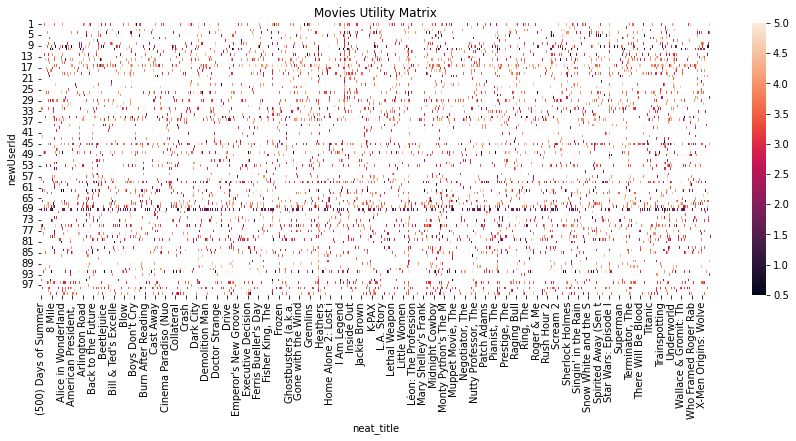

In [53]:
# Create a neat version of the utility matrix to assist with plotting book titles 
rating3['neat_title'] = rating3['title'].apply(lambda x: x[:20])
util_matrix_neat = rating3.pivot_table(index=['newUserId'], 
                                       columns=['neat_title'], 
                                       values='rating')

fig, ax = plt.subplots(figsize=(15,5))
# We select only the first 100 users for ease of computation and visualisation. 
# You can play around with this value to see more of the utility matrix. 
_ = sns.heatmap(util_matrix_neat[:100], annot=False, ax=ax).set_title('Movies Utility Matrix')

In [55]:
# we construct our utility matrix easily by using the pivot_table function

util_matrix = rating3.pivot_table(index=['userId'], 
                                   columns=['movieId'], 
                                   values='rating') 
util_matrix.shape

(1000, 1000)

In [56]:
# Normalize each row (a given user's ratings) of the utility matrix
util_matrix_norm = util_matrix.apply(lambda x: 
                                     (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
# Fill Nan values with 0's, transpose matrix, and drop users with no ratings
util_matrix_norm.fillna(0, inplace=True)
util_matrix_norm = util_matrix_norm.T
util_matrix_norm = util_matrix_norm.loc[:, (util_matrix_norm != 0).any(axis=0)]
# Save the utility matrix in scipy's sparse matrix format
util_matrix_sparse = sp.sparse.csr_matrix(util_matrix_norm.values)

In [57]:
# Compute the similarity matrix using the cosine similarity metric
user_similarity = cosine_similarity(util_matrix_sparse.T)
# Save the matrix as a dataframe to allow for easier indexing  
user_sim_df = pd.DataFrame(user_similarity, 
                           index = util_matrix_norm.columns, 
                           columns = util_matrix_norm.columns)

# Review a small portion of the constructed similartiy matrix  
user_sim_df[:5]

userId,75,92,494,510,593,641,864,1185,1600,1663,...,161306,161635,161897,161900,161994,162001,162045,162163,162236,162466
userId,,,,,,,,,,,,,,,,,,,,,
75,1.000000,0.187660,0.051678,0.015679,-0.014313,0.044433,-0.005923,0.024243,0.006402,0.086294,...,0.031807,-0.005745,0.034734,-0.029039,-0.064879,-0.041914,0.004906,0.047397,0.005179,0.002356
92,0.187660,1.000000,0.096478,0.051341,-0.061763,-0.001576,-0.036944,0.038738,0.087323,0.068732,...,0.041511,-0.007598,0.011752,0.000000,0.126700,-0.029144,-0.009879,0.051348,0.049971,-0.026036
494,0.051678,0.096478,1.000000,0.049271,-0.000296,0.003398,0.029930,0.018050,0.028923,0.000589,...,0.000000,0.000000,0.029807,-0.018462,0.012977,-0.004489,-0.028933,-0.047150,0.034311,-0.035128
510,0.015679,0.051341,0.049271,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010615
593,-0.014313,-0.061763,-0.000296,0.000000,1.000000,0.000000,0.000000,0.000000,-0.124242,0.000000,...,0.000000,0.000000,0.019206,0.000000,0.000000,0.171704,0.082729,0.000000,0.000000,0.026532


In [58]:
def collab_generate_top_N_recommendations(user, N=10, k=20):
    # Cold-start problem - no ratings given by the reference user. 
    # With no further user data, we solve this by simply recommending
    # the top-N most popular books in the item catalog. 
    if user not in user_sim_df.columns:
        return rating3.groupby('title').mean().sort_values(by='rating',
                                        ascending=False).index[:N].to_list()
    
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    favorite_user_items = [] # List of highest rated items, from the k users  
    most_common_favorites = {} # Dict: highest rated items, common for the k users
    
    for i in sim_users:
        # Maximum rating given by the current user to an item 
        max_score = util_matrix_norm.loc[:, i].max()
        # Save the names of items maximally rated by the current user   
        favorite_user_items.append(
            util_matrix_norm[util_matrix_norm.loc[:, i]==max_score].index.tolist())
        
    # Loop over each user's favorite items and tally which ones are 
    # most popular overall.
    for item_collection in range(len(favorite_user_items)):
        for item in favorite_user_items[item_collection]: 
            if item in most_common_favorites:
                most_common_favorites[item] += 1
            else:
                most_common_favorites[item] = 1
    # Sort the overall most popular items and return the top-N instances
    sorted_list = sorted(most_common_favorites.items(), key=operator.itemgetter(1), reverse=True)[:N]
    top_N = [x[0] for x in sorted_list]
    return top_N

In [59]:
# Our recommended list for user 41
collab_generate_top_N_recommendations(41)

['Elephant Man, The',
 'Shawshank Redemption, The',
 '12 Angry Men',
 'Postman, The (Postino, Il)',
 'North by Northwest',
 'Grand Day Out with Wallace and Gromit, A',
 'Godfather, The',
 'Godfather: Part II, The',
 'Rear Window',
 'My Neighbor Totoro (Tonari no Totoro)']

In [60]:
# User 41's historical ratings. only 10 shown
rating3[rating3['newUserId'] == 41][:][['movieId','rating']].sort_values(by='rating', ascending=False)[:10]

,movieId,rating
3685,1196,5.0
3687,527,5.0
3701,593,5.0
3717,529,4.0
3695,110,4.0
3709,708,4.0
3703,36,4.0
3710,515,4.0
3683,1265,4.0
3699,1210,4.0


In [61]:
def collab_generate_rating_estimate(movieId, userId, k=20, threshold=0.0):
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=userId, ascending=False).index[1:k+1]
    # Store the corresponding user's similarity values 
    user_values = user_sim_df.sort_values(by=userId, 
                                          ascending=False
                                         ).loc[:,userId].tolist()[1:k+1]
    rating_list = [] # <-- List of k user's ratings for the reference item
    weight_list = [] # <-- List of k user's similarities to the reference user
    
    # Create a weighted sum for each of the k users who have rated the 
    # reference item (book).
    for sim_idx, user_id in enumerate(sim_users):
        # User's rating of the item
        rating = util_matrix.loc[user_id, movieId]
        # User's similarity to the reference user 
        similarity = user_values[sim_idx]
        # Skip the user if they have not rated the item, or are too dissimilar to 
        # the reference user
        if (np.isnan(rating)) or (similarity < threshold):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    try:
        # Return the weighted sum as the predicted rating for the reference item
        predicted_rating = sum(rating_list)/sum(weight_list) 
    except ZeroDivisionError:
        # If no ratings for the reference item can be collected, return the average 
        # rating given by all users for the item.  
        predicted_rating = np.mean(util_matrix[movieId])
    return userId, predicted_rating

In [ ]:
# we picked a movie title "Goodfellas"  and compared ratings

title = "Goodfellas"
actual_rating = rating3[(rating3['newUserId'] == 41) & (rating3['title'] == title)]['rating'].values[0]
pred_rating = collab_generate_rating_estimate(movie_title = title, user = 41)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

In [ ]:
# we picked a movie titled "Reservoir Dogs"  and compared ratings

title = "Reservoir Dogs"
actual_rating = rating3[(rating3['newUserId'] == 41) & (rating3['title'] == title)]['rating'].values[0]
pred_rating = collab_generate_rating_estimate(movie_title = title, user = 41)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

### 1.4.2 Preprocessing 2 - Standardization
In this step, the task is to complete preprocessing on the train and test datasets ahead of modeling. First, 

#### 1.4.2.1 Standardizing the features
Create a `stand` function to complete the task of standardization.

##### view a plot of the 2D features

With this level of cleaning concluded, the model building and development stage follows next.

# Section 2: Model Development and Analysis

This section describes the steps and processes involved in building models for the project as well as the analysis of the model performance in terms of their accuracy in accomplishing the classification task.

# <a id="five"></a>
## 2.1 Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, the **TeamNM3** team explored the following models for their skill and strengths with regards processing  was considered in the model development. The models include:

- 1. L
- 2. S 
---
The initial task is to build a base model using ...

### 2.1.1 Overview of the Selected Models

### 2.1.2 Fit, Train and Predict with a base model
The first step of modeling involved fitting, training and predicting a base model of ...

### DISCUSSION
The two outputs above are 

### 2.1.3 Building other models 
With the base model fully operational, it is now reasonable to develop other models that can strengthen the recommendation system task. As with all the earlier stages of the data science process, functions are built to help enhance the functionality of training and testing the datasets.

#### 2.1.3.1 Create model objects for all models

#### 2.1.3.2 Create functions for training and testing all models
Two functions `train_model` and `test_model` are created to optimize the process of training and testing all selected models.

In [ ]:
# create a function to train our models
def train_model(model, X, y):

    ''' returns a model trained on the training dataset
        parameters:
            model:   a machine learning model
            X:
    '''    
    return model.fit(X, y)

### 2.1.4 Model Fitting, Training and Predictions

The models are fitted and trained on the balanced datasets and then used for predicting the tweet classification task on the unseen dataset. The process involves using the trained models by calling on built functions. 

First, the prediction is done with the validation dataset which has a label but has not been resampled. This prediction results are used in the next sub-section for evaluating the model performance. Another prediction set is conducted subsequently on the blind test dataset which has no labels. This prediction is used for the Kaggle submission to obtain external scores on the performance of the models.

#### 2.1.4.1 Model 1: 

In [ ]:
# training the 

#### 2.1.4.2 Model 2: 

In [ ]:
# training the support vector machine 


### 2.1.5 Extract Results for Submission
With the model fitting, training and prediction tasks completed, it is now possible to extract results from some of the models for submission on Kaggle as well as for use in Streamlit web app development.

#### Extracting Results for Submission - Kaggle

In [41]:
#create a Kaggle submission file for the model
results_dict = pd.DataFrame({
                    'Id':df_test['userId'].astype(str) 
                            +'_'+ df_test['movieId'].astype(str),
                    'rating': predictions})

results_dict.to_csv('submission_base3.csv', index = False)

#### Extracting pkl file for web app development

In [ ]:
# pickle/save base model for Streamlit web deployment
model_save_path = "lgr_base.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lgr_train,file)

<a id="six"></a>
## 2.2 Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section, the relative performance of the selected classification models against some common metrics are compared and considered. The following metrics are deployed in checking the model performance using functions, as previously established:
-  |

---
**xxx**

.


### 2.2.1 Model Scores, Matrices and Heatmaps
A function is built to take care of the `roc_auc_score` calculation.

In [ ]:
# define a function for calculating roc scores
def roc_score(model, X_valid, y_valid):    
    # with the model previously instantiated, 

    return res

#### 2.2.1.1 Scores and Matrices of models trained on the balanced training dataset
The scores of models trained on the resampled datasets are first verified and then tabulated and plotted for easy comparison.

#### Model 1: 

In [ ]:
# print roc_score for xxx model

#### Model 2: Support Vector

In [ ]:
# plot bar of roc
roc_factsheet.plot(kind='bar', title='ROC scores across selected xxx')

### DISCUSSION
In the simple barplot of the ROC scores above, 

### DISCUSSION
In this instance,

### 2.2.2 Improving model performance

The results above ...

#### 2.2.2.1 Implementing Hyperparameter tuning to improve model performance

# Section 3: Model Explanations and Conclusions

This section describes

<a id="seven"></a>
## 3.1 Model Explanation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss the inner workings of some of the selected models work in an attempt to understand how the models have performed the task. We discuss the following models:
- 
- Support Vector Machines,
- Random Forest.|

---

### 3.1.1 Understanding the inner workings of select models

### 3.1.2 Characteristics and Advantages of the Best Performing Models

<a id="seven"></a>
## 3.2 Conclusions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we draw conclusions and consider a few recommendations based on the discussions and investigations conducted for this Twitter classification project.|

---

In conclusion, it can be said that:
- the data available from the 

Finally, it is evident that deploying machine learning solutions that are well-tuned to 

Thus, thorough consideration of the strategic objectives and direction of the company with regards to interventions to be supported by insights from the ... can improve the choice of the machine learning model that best delivers on the recommendation system task.

### 3.2.1 Logging and extracting parameters for Comet experiments

In [ ]:
# create dictionaries for the data we want to log

# metrics
metrics_nbc_smt = {"f1": nbc_smt_f1, "recall": nbc_smt_r, 
                  "precision": nbc_smt_p, "roc": nbc_roc}

# parameters
params_nbc_smt = {"vectorizer": tf_vect, "model_type": "naive bayes", 
                 "model": nbc_smt, "robust scaler": rs, "Min Max": mm}

#params_abc_sm = {"random_state": 42, "vectorizer": tf_vect, 
 #                "model_type": "ada boost", "model": abc_sm, 
 #                "robust scaler": rs, "Min Max": mm, 
 #                 "base_estimator": rfc}

In [ ]:
# Log our parameters and results
experiment.log_parameters(params_nbc_smt)
experiment.log_metrics(metrics_nbc_smt)

In [ ]:
# end the experiment on Comet
experiment.end()

Running experiment.display() will show the experiments comet.ml page

In [ ]:
# display the experiment parameters on Comet
experiment.display()